## Trabajo Final Semana 1

In [93]:
import requests # librería para manejar las solicitudes
import pandas as pd # librería para análisis de datos
import numpy as np # librería para manejar datos vectorizados
import random # librería para generar números aleatorios

!pip install geopy
from geopy.geocoders import Nominatim # módulo para convertir una dirección en valores de latitud y longitud 

# librerías para mostrar imágenes 
from IPython.display import Image 
from IPython.core.display import HTML 
    
# librería para convertir un archivo json en un dataframe pandas
from pandas.io.json import json_normalize

#! pip install folium==0.5.0
##! pip install geocoder

import folium # librería para graficar 

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
#Como datos referenciales tomaremos inicialmente la ubicacion de la capital'
address = 'Fredericton'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

45.94845575 -66.6530224218406


In [106]:
Columnas = ['Campus','Nombre','Tipo','Latitud','Longitud']
df_servicios = pd.DataFrame(columns=Columnas)
df_servicios_todos = pd.DataFrame(columns=columnas)


In [125]:
#obtener un ejemplo de los lugares cercanos al centro de la ciudad desde la API de Foursquare
import pprint
import json, requests

primer_registro = coordenadas.iloc[5]
campo_campus = primer_registro['Campus']
campo_latitud = primer_registro['Latitud']
campo_longitud = primer_registro['Longitud']

campus =  primer_registro['Campus']
V = '20230424'
LIMIT = 50
radius = 2000
Squery = 'Pharmacies'  #&query={}
latC = primer_registro['Latitud']
lonC = primer_registro['Longitud']

#url = 'https://api.foursquare.com/v3/places/search?&ll={},{}&radius={}&limit={}&query={}'.format(
url = 'https://api.foursquare.com/v3/places/search?&ll={},{}&radius={}&limit={}'.format(
            latC, 
            lonC, 
            radius, 
            LIMIT,        
            #Squery
            )


headers = {
        'Accept': 'application/json',
        'Authorization': 'fsq3I4dlwnIeFKS3V4g2uVHafKaUXeVU+9ESR6JECITFFAE='
    }

data = requests.request("GET",url, headers=headers)
data_dict = json.loads(data.text)
data_dict['results']
resultados = data_dict['results']

In [126]:
for resultado in resultados:
    try:
        name = resultado['name']
        latitude = resultado['geocodes']['main']['latitude']
        longitude = resultado['geocodes']['main']['longitude']
        category_name = resultado['categories'][0]['name']

        df_servicios = df_servicios.append({'Campus':campus,
                                       'Nombre':name,
                                       'Tipo':category_name,
                                       'Latitud':latitude,
                                       'Longitud':longitude}, ignore_index=True)
    except Exception as e:
        print("Error al procesar un resultado: {e}")


Error al procesar un resultado: list index out of range
Error al procesar un resultado: list index out of range
Error al procesar un resultado: list index out of range
Error al procesar un resultado: list index out of range


C:\Users\User\AppData\Local\Temp\ipykernel_26124\320926835.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_servicios = df_servicios.append({'Campus':campus,
C:\Users\User\AppData\Local\Temp\ipykernel_26124\320926835.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_servicios = df_servicios.append({'Campus':campus,
C:\Users\User\AppData\Local\Temp\ipykernel_26124\320926835.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_servicios = df_servicios.append({'Campus':campus,
C:\Users\User\AppData\Local\Temp\ipykernel_26124\320926835.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_servicios = df_servicios.append({'Camp

In [127]:
#df_servicios
# Agregar los nuevos registros al DataFrame existente
#df_servicios_todos = pd.concat([df_servicios_todos, df_servicios], ignore_index=True)
#df_servicios_todos

,Campus,Nombre,Tipo,Latitud,Longitud
0,NBCC Fredericton,Preschool Centre,Daycare,45.947553,-66.645141
1,NBCC Fredericton,The Cellar Pub & Grill,Pub,45.945306,-66.641587
2,NBCC Fredericton,Tim Hortons,"Cafes, Coffee, and Tea Houses",45.944655,-66.645162
3,NBCC Fredericton,Grad House,Pub,45.948410,-66.643869
4,NBCC Fredericton,The Richard J. CURRIE Center - UNB,Sports and Recreation,45.946530,-66.638134
...,...,...,...,...,...
274,NBCC Woodstock,The Cash Store,Loans Agency,46.150117,-67.573980
275,NBCC Woodstock,K-Line Construction Ltd,General Contractor,46.150117,-67.573980
276,NBCC Woodstock,Western Valley P R O Kids,Youth Organization,46.150114,-67.573883
277,NBCC Woodstock,Dollarama,Discount Store,46.150484,-67.573015


In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # opcional: para estilo tipo ggplot

# revisar la última versión de Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

In [128]:
coordenadas = pd.read_csv('TrabajoFinalCapstoneCoordenadasNBCC.csv')
coordenadas.head(10)

,Campus,Latitud,Longitud
0,NBCC Fredericton,45.947068,-66.644382
1,NBCC Moncton,46.108091,-64.829347
2,NBCC Miramichi,47.028173,-65.466482
3,NBCC St Andrews,45.077800,-67.054616
4,NBCC Saint John Grandview,45.286812,-65.993679
5,NBCC Woodstock,46.152842,-67.576219


In [160]:
Localidad = 5
CampusVal = coordenadas.iloc[Localidad]

In [161]:
ServiciosPorCampusDF = pd.read_csv('ServiciosPorCampusCsv.csv', sep=';')
Servicios0 = ServiciosPorCampusDF.loc[ServiciosPorCampusDF['Campus'] == CampusVal.Campus]
Servicios0.head(10)
#CampusVal.Campus

,Campus,Clase,Cantidad
49,NBCC Woodstock,Bank/Serv.Finan,6
50,NBCC Woodstock,Bar,1
51,NBCC Woodstock,Car/Mechanical,1
52,NBCC Woodstock,Construction,2
53,NBCC Woodstock,Culture,1
54,NBCC Woodstock,Food,6
55,NBCC Woodstock,Health Beauty Serv.,4
56,NBCC Woodstock,Recreation,3
57,NBCC Woodstock,Serv. Law Gob,11
58,NBCC Woodstock,Store,10


In [162]:
ServiciosTablaDF = pd.read_csv('ServiciosTablaCsv.csv', sep=';')
ServiciosTablaDF.head(15)

,Clase,NBCC Fredericton,NBCC Moncton,NBCC Miramichi,NBCC St Andrews,NBCC Saint John Grandview,NBCC Woodstock,Color
0,Bank/Serv.Finan,1,3,2,3,0,6,black
1,Bar,6,1,1,3,0,1,grey
2,Car/Mechanical,0,1,0,0,5,1,lightgrey
3,Construction,0,1,1,2,7,2,rosybrown
4,Culture,2,0,1,3,0,1,maroon
5,Daycare,2,0,0,0,0,0,salmon
6,Drugstore,1,1,2,2,0,0,sandybrown
7,Food,22,14,10,11,2,6,wheat
8,Gas,0,1,1,0,0,0,gold
9,Health Beauty Serv.,0,7,5,2,5,4,yellow


In [163]:
#cargar archivo csv con las coordenadas de los campus de New Bronswick Colleges
ClasesDf = ServiciosTablaDF.iloc[:, [0, 7]]

ServiciosDF = pd.read_csv('ServiciosCsv.csv', sep=';')
ServiciosDet = ServiciosDF.loc[ServiciosDF['Campus'] == CampusVal.Campus]
ServiciosDetDF = pd.merge(ServiciosDet, ClasesDf, on='Clase')
ServiciosDetDF.head(5)

,Campus,Nombre,Tipo,Clase,Latitud,Longitud,Color
0,NBCC Woodstock,TD Bank Financial Group,Bank,Bank/Serv.Finan,46.151924,-67.573500,black
1,NBCC Woodstock,TD Bank Financial Group,Bank,Bank/Serv.Finan,46.151921,-67.573403,black
2,NBCC Woodstock,BMO Bank of Montreal,Bank,Bank/Serv.Finan,46.150487,-67.573112,black
3,NBCC Woodstock,RBC Royal Bank,ATM,Bank/Serv.Finan,46.146871,-67.573975,black
4,NBCC Woodstock,Frontgate Financial Group,Financial Planner,Bank/Serv.Finan,46.150938,-67.572968,black


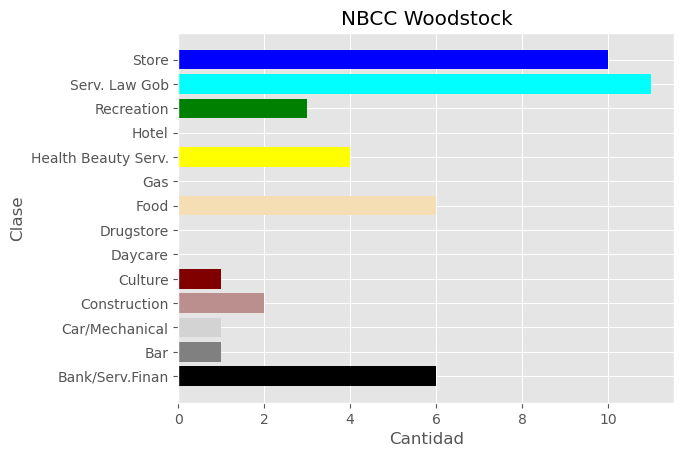

In [164]:
colores = ServiciosTablaDF['Color'].tolist()
plt.barh(ServiciosTablaDF['Clase'], ServiciosTablaDF.iloc[:, Localidad+1], color=colores)

plt.xlabel('Cantidad')
plt.ylabel('Clase')
plt.title(CampusVal.Campus)
plt.show()

In [165]:
latitudeV = CampusVal.Latitud
longitudeV = CampusVal.Longitud
venues_map = folium.Map(location=[latitudeV, longitudeV], zoom_start=13) # generate map centred around Ecco

# Añadir Ecco como una marca circular roja
folium.CircleMarker(
    [latitudeV, longitudeV],
    radius=10,
    popup=CampusVal.Campus,
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

# añadir sitios populares al mapa como marcas circulares azules
for lat, lng, label, ColorT in zip(ServiciosDetDF.Latitud, ServiciosDetDF.Longitud, ServiciosDetDF.Nombre, ServiciosDetDF.Color):
    #print(lat, lng, label)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        fill=True,
        color='black',
        fill_color=ColorT,
        fill_opacity=0.9
        ).add_to(venues_map)

# mostrar mapa
venues_map